In [136]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [137]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [138]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [139]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [140]:
#  3. Convert the June temperatures to a list.
results =[]
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==6).all()
print(results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [141]:
# 4. Create a DataFrame from the list of temperatures for the month of June 
df = pd.DataFrame(results, columns=['date','June Temps'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()
print(df.to_string(index=False))

       date  June Temps
 2010-06-01        78.0
 2010-06-01        73.0
 2010-06-01        77.0
 2010-06-01        69.0
 2010-06-01        76.0
 2010-06-01        71.0
 2010-06-01        74.0
 2010-06-01        70.0
 2010-06-01        74.0
 2010-06-02        78.0
 2010-06-02        70.0
 2010-06-02        76.0
 2010-06-02        76.0
 2010-06-02        71.0
 2010-06-02        76.0
 2010-06-02        76.0
 2010-06-02        72.0
 2010-06-02        76.0
 2010-06-03        74.0
 2010-06-03        78.0
 2010-06-03        73.0
 2010-06-03        72.0
 2010-06-03        77.0
 2010-06-03        76.0
 2010-06-03        75.0
 2010-06-03        78.0
 2010-06-03        67.0
 2010-06-04        73.0
 2010-06-04        75.0
 2010-06-04        75.0
 2010-06-04        76.0
 2010-06-04        73.0
 2010-06-04        68.0
 2010-06-04        72.0
 2010-06-04        70.0
 2010-06-04        74.0
 2010-06-05        73.0
 2010-06-05        77.0
 2010-06-05        78.0
 2010-06-05        76.0
 2010-06-05     

In [142]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [143]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [144]:
# 7. Convert the December temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date)==12).all()
print(results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [145]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results, columns=['date','December Temps'])
#df.set_index(df['date'], inplace=True)
df = df.sort_index()
print(df.to_string(index=False))

       date  December Temps
 2010-12-01            76.0
 2010-12-03            74.0
 2010-12-04            74.0
 2010-12-06            64.0
 2010-12-07            64.0
 2010-12-08            67.0
 2010-12-09            77.0
 2010-12-10            66.0
 2010-12-11            69.0
 2010-12-12            68.0
 2010-12-13            68.0
 2010-12-14            71.0
 2010-12-15            74.0
 2010-12-16            67.0
 2010-12-17            66.0
 2010-12-18            69.0
 2010-12-19            71.0
 2010-12-23            70.0
 2010-12-24            70.0
 2010-12-26            74.0
 2010-12-27            74.0
 2010-12-28            71.0
 2010-12-29            75.0
 2010-12-30            75.0
 2010-12-31            72.0
 2011-12-01            69.0
 2011-12-02            68.0
 2011-12-03            73.0
 2011-12-04            74.0
 2011-12-05            73.0
 2011-12-06            73.0
 2011-12-07            73.0
 2011-12-08            73.0
 2011-12-09            71.0
 2011-12-10         

In [150]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [151]:
################################################

# Information for README Analysis

In [152]:
# Determining most active and least active  stations
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [153]:
import os
# import station file
station_file = "station.csv"
station_path = os.path.join('./Resources', station_file)

station_df = pd.read_csv(station_path)
station_df.head(9)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [154]:
# Daily normal avg historical temp (min,avg, max) Christmas Day

def daily_normals(date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("12-25")

[(60.0, 71.75, 79.0)]

In [155]:
# calculate the daily normals for specific time period 


# Set the start and end date of the trip
vac_start = '2016-12-25'
vac_end = '2016-12-31'

# Use the start and end date to create a range of dates
vac_dates = pd.date_range(vac_start, vac_end, freq='D')

# Stip off the year and save a list of %m-%d strings
vac_month_day = vac_dates.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in vac_month_day:
    normals.append(*daily_normals(date))
    
normals

[(60.0, 71.75, 79.0),
 (63.0, 71.44680851063829, 77.0),
 (62.0, 71.91666666666667, 79.0),
 (62.0, 70.52083333333333, 77.0),
 (57.0, 70.29166666666667, 78.0),
 (63.0, 69.86363636363636, 76.0),
 (56.0, 68.27906976744185, 77.0)]

In [156]:
df = pd.DataFrame(normals, columns=['Min', 'Avg', 'Max'])
df['date'] = vac_dates
df.set_index(['date'],inplace=True)
df.head(7)

,Min,Avg,Max
date,,,
2016-12-25,60.0,71.750000,79.0
2016-12-26,63.0,71.446809,77.0
2016-12-27,62.0,71.916667,79.0
2016-12-28,62.0,70.520833,77.0
2016-12-29,57.0,70.291667,78.0
2016-12-30,63.0,69.863636,76.0
2016-12-31,56.0,68.279070,77.0


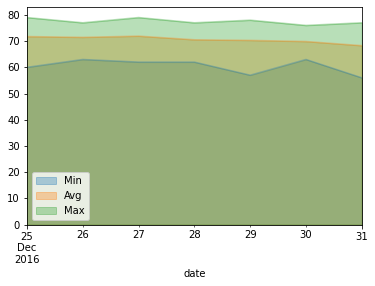

In [157]:
df = df.plot.area(stacked=False, alpha=.333)

In [158]:
# Design a query to retrieve  precipitation data  
#Starting from the last data point in the database. 

prev_year = dt.date(2016, 12, 24) - dt.timedelta(days=365)
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
df = pd.DataFrame(results, columns=['date','precipitation'])
print(df.to_string(index=False))



       date  precipitation
 2015-12-25           0.00
 2015-12-26           0.02
 2015-12-27           0.43
 2015-12-28           0.01
 2015-12-29           0.00
 2015-12-30           0.00
 2015-12-31           0.00
 2016-01-01           0.00
 2016-01-02           0.00
 2016-01-03           0.00
 2016-01-04           0.00
 2016-01-05           0.00
 2016-01-06           0.00
 2016-01-07           0.18
 2016-01-08           0.01
 2016-01-09           0.03
 2016-01-10           0.01
 2016-01-11           0.00
 2016-01-12           0.00
 2016-01-13           0.00
 2016-01-14           0.00
 2016-01-15           0.00
 2016-01-16           0.01
 2016-01-17           0.00
 2016-01-18           0.00
 2016-01-19           0.00
 2016-01-20           0.00
 2016-01-21           0.00
 2016-01-22           0.00
 2016-01-23           0.00
 2016-01-24           0.00
 2016-01-25           0.04
 2016-01-26           0.16
 2016-01-27           0.01
 2016-01-28           0.00
 2016-01-29           0.00
 

In [159]:
def calc_temps(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2017-06-01', '2017-06-30'))

[(71.0, 77.21989528795811, 83.0)]
